# Classification of synthetic time series data
Following on from simulating data using SSA, we aim to classify the time series generated with an ML algorithm e.g, Support Vector Machine (SVM), and they need to be similar enough to be difficult to classify.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from tqdm import tqdm

# Import all the functions from the 'src' directory
from stats.report import *
from visualisation.plots import *
from stats.autocorrelation import *
from utils.cv import calculate_cv
from utils.steady_state import save_steady_state
from simulation.simulate_telegraph_model import simulate_two_telegraph_model_systems

%load_ext autoreload
%autoreload 2

## Read in the IY007C data

In [ ]:
# Read in accuracy data
df_IY007 = pd.read_csv("/home/ianyang/stochastic_simulations/experiments/EXP-25-IY007/data/IY007C.csv")
cv_ratios_recorded = df_IY007["CV Ratio"].unique()
#then compute mean
linear_svm_accuracy = df_IY007.groupby("CV Ratio")["SVM (linear) Accuracy"].mean()
rbf_svm_accuracy = df_IY007.groupby("CV Ratio")["SVM (rbf) Accuracy"].mean()
rf_accuracy = df_IY007.groupby("CV Ratio")["Random Forest Accuracy"].mean()
log_reg_accuracy = df_IY007.groupby("CV Ratio")["Logistic Regression Accuracy"].mean()
mlp_accuracy = df_IY007.groupby("CV Ratio")["MLP Accuracy"].mean()
random_accuracy = df_IY007.groupby("CV Ratio")["Random Classifier Accuracy"].mean()
lstm_accuracy = df_IY007.groupby("CV Ratio")["Vanilla LSTM Accuracy"].mean()
iy001a_accuracy = df_IY007.groupby("CV Ratio")["IY001A Accuracy"].mean()
vanilla_transformer_accuracy = df_IY007.groupby("CV Ratio")["Vanilla Transformer Accuracy"].mean()
full_transformer_accuracy = df_IY007.groupby("CV Ratio")["Full Transformer Accuracy"].mean()
iy006b_accuracy = df_IY007.groupby("CV Ratio")["IY006B Transformer Accuracy"].mean()

## Plot everything

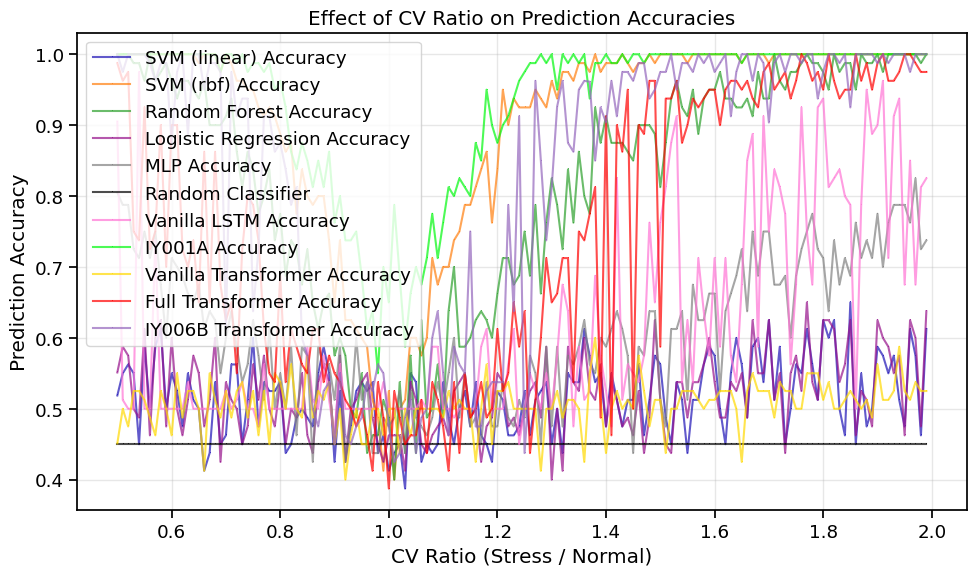

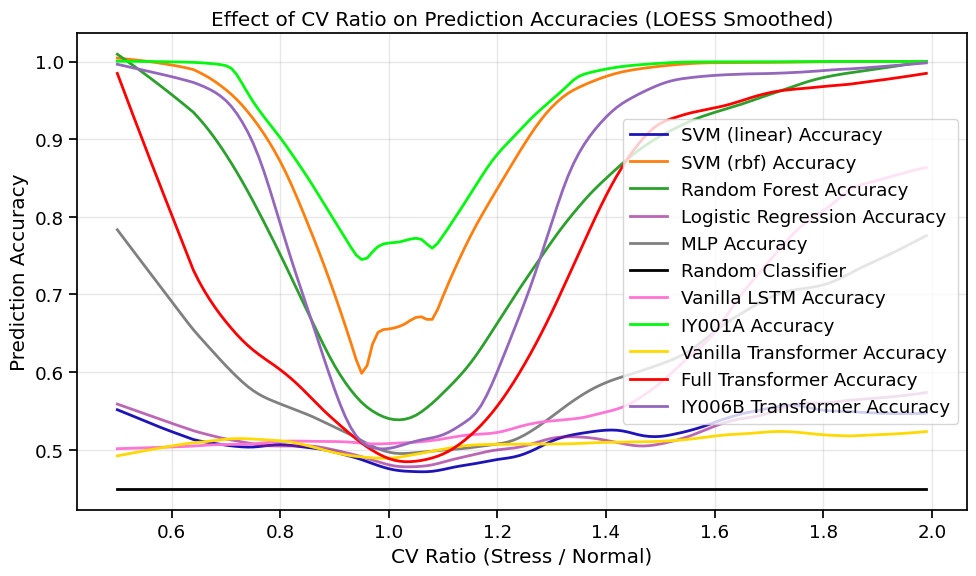

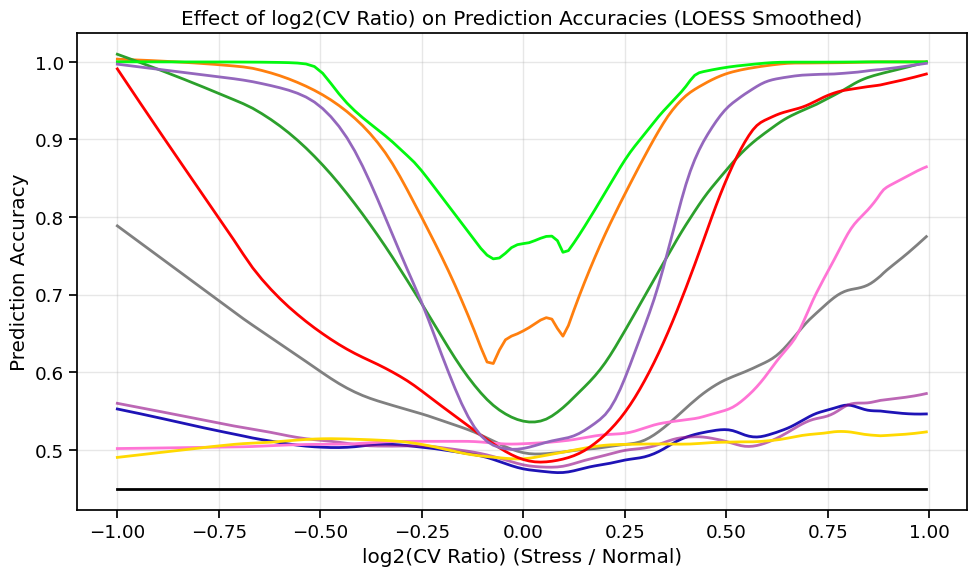

In [10]:
# Define a better color palette for improved visibility
colors = {
    'linear_svm': "#1E13B6",      
    'rbf_svm': '#ff7f0e',          # Orange
    'random_forest': '#2ca02c',    # Green
    'logistic_reg': "#96118ba3",    # Pink
    'mlp': 'gray',              #   Gray
    'random': 'Black',           # Black
    'lstm': "#ff74d5",             # Pink
    'iy001a': "#02f80f",           # Yellow-green
    'iy002a': '#17becf',           # Cyan
    'vanilla_transformer': "#ffd901", # Yellow
    'full_transformer': "#ff0000",  # Red
    'iy006b': '#9467bd'            # Purple
}

# Plot the raw data with improved colors
plt.figure(figsize=(10, 6))
# Plot CV Ratio vs Classifier Accuracies
plt.plot(cv_ratios_recorded, linear_svm_accuracy, marker=',', linestyle='-', color=colors['linear_svm'], label="SVM (linear) Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, rbf_svm_accuracy, marker=',', linestyle='-', color=colors['rbf_svm'], label="SVM (rbf) Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, rf_accuracy, marker=',', linestyle='-', color=colors['random_forest'], label="Random Forest Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, log_reg_accuracy, marker=',', linestyle='-', color=colors['logistic_reg'], label="Logistic Regression Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, mlp_accuracy, marker=',', linestyle='-', color=colors['mlp'], label="MLP Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, random_accuracy, marker=',', linestyle='-', color=colors['random'], label="Random Classifier", alpha=0.7)
plt.plot(cv_ratios_recorded, lstm_accuracy, marker=',', linestyle='-', color=colors['lstm'], label="Vanilla LSTM Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, iy001a_accuracy, marker=',', linestyle='-', color=colors['iy001a'], label="IY001A Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, vanilla_transformer_accuracy, marker=',', linestyle='-', color=colors['vanilla_transformer'], label="Vanilla Transformer Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, full_transformer_accuracy, marker=',', linestyle='-', color=colors['full_transformer'], label="Full Transformer Accuracy", alpha=0.7)
plt.plot(cv_ratios_recorded, iy006b_accuracy, marker=',', linestyle='-', color=colors['iy006b'], label="IY006B Transformer Accuracy", alpha=0.7)

plt.xlabel("CV Ratio (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of CV Ratio on Prediction Accuracies")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/variance_ratio_vs_accuracy_better_colors.png", bbox_inches='tight')
plt.show()

# Apply LOESS smoothing to the data
linear_svm_loess = lowess(linear_svm_accuracy, cv_ratios_recorded, frac=0.2)
rbf_svm_loess = lowess(rbf_svm_accuracy, cv_ratios_recorded, frac=0.2)
rf_loess = lowess(rf_accuracy, cv_ratios_recorded, frac=0.2)
log_reg_loess = lowess(log_reg_accuracy, cv_ratios_recorded, frac=0.2)
mlp_loess = lowess(mlp_accuracy, cv_ratios_recorded, frac=0.2)
random_loess = lowess(random_accuracy, cv_ratios_recorded, frac=0.2)
lstm_loess = lowess(lstm_accuracy, cv_ratios_recorded, frac=0.2)
iy001a_loess = lowess(iy001a_accuracy, cv_ratios_recorded, frac=0.2)
vanilla_transformer_loess = lowess(vanilla_transformer_accuracy, cv_ratios_recorded, frac=0.2)
full_transformer_loess = lowess(full_transformer_accuracy, cv_ratios_recorded, frac=0.2)
iy006b_loess = lowess(iy006b_accuracy, cv_ratios_recorded, frac=0.2)
# Plot the LOESS smoothed data with improved colors
plt.figure(figsize=(10, 6))
plt.plot(linear_svm_loess[:, 0], linear_svm_loess[:, 1], linestyle='-', color=colors['linear_svm'], linewidth=2, label="SVM (linear) Accuracy")
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
plt.plot(rf_loess[:, 0], rf_loess[:, 1], linestyle='-', color=colors['random_forest'], linewidth=2, label="Random Forest Accuracy")
plt.plot(log_reg_loess[:, 0], log_reg_loess[:, 1], linestyle='-', color=colors['logistic_reg'], linewidth=2, label="Logistic Regression Accuracy")
plt.plot(mlp_loess[:, 0], mlp_loess[:, 1], linestyle='-', color=colors['mlp'], linewidth=2, label="MLP Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
plt.plot(lstm_loess[:, 0], lstm_loess[:, 1], linestyle='-', color=colors['lstm'], linewidth=2, label="Vanilla LSTM Accuracy")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="IY001A Accuracy")
# Uncomment if you have iy002a_loess
# plt.plot(iy002a_loess[:, 0], iy002a_loess[:, 1], linestyle='-', color=colors['iy002a'], linewidth=2, label="IY002A Accuracy")
plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Full Transformer Accuracy")
plt.plot(iy006b_loess[:, 0], iy006b_loess[:, 1], linestyle='-', color=colors['iy006b'], linewidth=2, label="IY006B Transformer Accuracy")

plt.xlabel("CV Ratio (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of CV Ratio on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/variance_ratio_vs_accuracy_loess_better_colors.png", bbox_inches='tight')
plt.show()

# Compute log2 of CV ratios
log2_cv_ratios = np.log2(cv_ratios_recorded)
# re-compute the loess smoothed data with log2 CV ratios
linear_svm_loess = lowess(linear_svm_accuracy, log2_cv_ratios, frac=0.2)
rbf_svm_loess = lowess(rbf_svm_accuracy, log2_cv_ratios, frac=0.2)
rf_loess = lowess(rf_accuracy, log2_cv_ratios, frac=0.2)
log_reg_loess = lowess(log_reg_accuracy, log2_cv_ratios, frac=0.2)
mlp_loess = lowess(mlp_accuracy, log2_cv_ratios, frac=0.2)
random_loess = lowess(random_accuracy, log2_cv_ratios, frac=0.2)
lstm_loess = lowess(lstm_accuracy, log2_cv_ratios, frac=0.2)
iy001a_loess = lowess(iy001a_accuracy, log2_cv_ratios, frac=0.2)
vanilla_transformer_loess = lowess(vanilla_transformer_accuracy, log2_cv_ratios, frac=0.2)
full_transformer_loess = lowess(full_transformer_accuracy, log2_cv_ratios, frac=0.2)
iy006b_loess = lowess(iy006b_accuracy, log2_cv_ratios, frac=0.2)

# plot the x-asis as log2(cv ratio) - lowess smoothed
plt.figure(figsize=(10, 6))
plt.plot(linear_svm_loess[:, 0], linear_svm_loess[:, 1], linestyle='-', color=colors['linear_svm'], linewidth=2, label="SVM (linear) Accuracy")
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
plt.plot(rf_loess[:, 0], rf_loess[:, 1], linestyle='-', color=colors['random_forest'], linewidth=2, label="Random Forest Accuracy")
plt.plot(log_reg_loess[:, 0], log_reg_loess[:, 1], linestyle='-', color=colors['logistic_reg'], linewidth=2, label="Logistic Regression Accuracy")
plt.plot(mlp_loess[:, 0], mlp_loess[:, 1], linestyle='-', color=colors['mlp'], linewidth=2, label="MLP Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
plt.plot(lstm_loess[:, 0], lstm_loess[:, 1], linestyle='-', color=colors['lstm'], linewidth=2, label="Vanilla LSTM Accuracy")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="IY001A Accuracy")
plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Full Transformer Accuracy")
plt.plot(iy006b_loess[:, 0], iy006b_loess[:, 1], linestyle='-', color=colors['iy006b'], linewidth=2, label="IY006B Transformer Accuracy")
plt.xlabel("log2(CV Ratio) (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of log2(CV Ratio) on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/cv_ratio_vs_accuracy_loess_log2_better_colors.png", bbox_inches='tight')
plt.show()

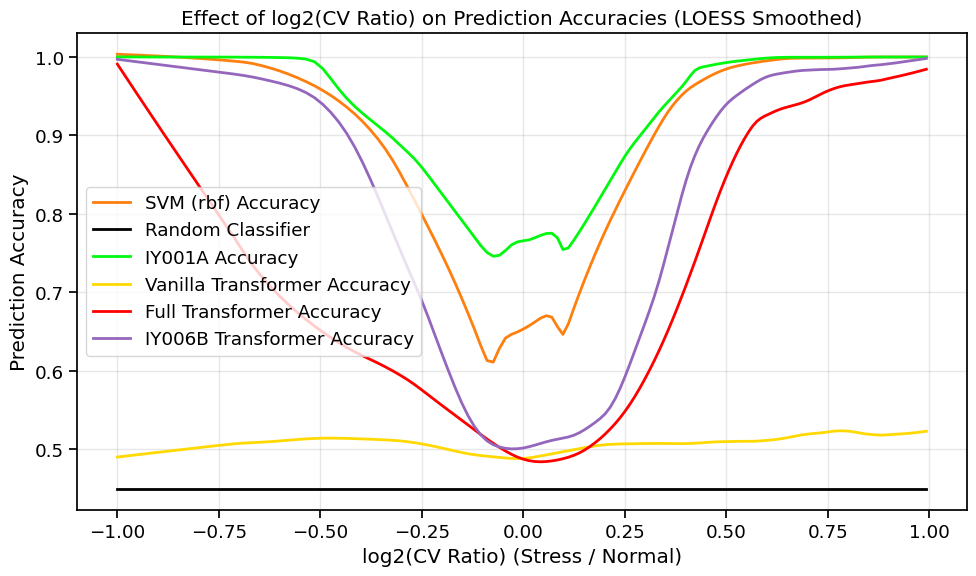

In [12]:
# Plot random classifier, SVM (rbf), IY001A and IY006B transformer accuracies
# plot the x-asis as log2(cv ratio) - lowess smoothed
plt.figure(figsize=(10, 6))
plt.plot(rbf_svm_loess[:, 0], rbf_svm_loess[:, 1], linestyle='-', color=colors['rbf_svm'], linewidth=2, label="SVM (rbf) Accuracy")
plt.plot(random_loess[:, 0], random_loess[:, 1], linestyle='-', color=colors['random'], linewidth=2, label="Random Classifier")
plt.plot(iy001a_loess[:, 0], iy001a_loess[:, 1], linestyle='-', color=colors['iy001a'], linewidth=2, label="IY001A Accuracy")
plt.plot(vanilla_transformer_loess[:, 0], vanilla_transformer_loess[:, 1], linestyle='-', color=colors['vanilla_transformer'], linewidth=2, label="Vanilla Transformer Accuracy")
plt.plot(full_transformer_loess[:, 0], full_transformer_loess[:, 1], linestyle='-', color=colors['full_transformer'], linewidth=2, label="Full Transformer Accuracy")
plt.plot(iy006b_loess[:, 0], iy006b_loess[:, 1], linestyle='-', color=colors['iy006b'], linewidth=2, label="IY006B Transformer Accuracy")
plt.xlabel("log2(CV Ratio) (Stress / Normal)")
plt.ylabel("Prediction Accuracy")
plt.title("Effect of log2(CV Ratio) on Prediction Accuracies (LOESS Smoothed)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
# plt.savefig("figs/cv_ratio_vs_accuracy_loess_log2_better_colors.png", bbox_inches='tight')
plt.show()